In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob

In [3]:
TravelTime = pd.read_csv("data/csv/Travel_time(newbus).csv")

In [11]:
TravelTime.loc[(TravelTime['route_id'] == '3-32') & (TravelTime['seq'] == 27) & (TravelTime['sid1'] == 3725)]

,Unnamed: 0,route_id,direction,seq,sid1,sid2,hrs,day_of_week,mins


In [78]:
df = pd.read_csv("data/csv/busstop.csv")

df.to_parquet("large.parquet", compression=None)

In [79]:
df = pd.read_parquet("large.parquet", engine="fastparquet")

### Preparing 

In [16]:
def get_inner_points(lat1,lon1,lat2,lon2, meters=100):
  res_list = [(lat1,lon1)]

  dist = 110*1000*((lat1-lat2)**2 + (lon1-lon2)**2)**0.5
  n_chunks = int(dist/meters)

  if n_chunks>0:
    dlat = (lat2-lat1)/n_chunks
    dlon = (lon2-lon1)/n_chunks

    for di in range(1, n_chunks+1):
      next_lat = lat1 + dlat*di
      next_lon = lon1 + dlon*di
      res_list.append((next_lat, next_lon))

  res_list.append((lat2,lon2))

  return res_list

def get_sq(lat,lon,diff=0.0001,num=2):
  res_list = []
  for i in range(-num,num+1):
    for j in range(-num,num+1):
      res_list.append((lat+diff*i, lon+diff*j))

  return res_list

import bisect


def find_in_sorted_list(elem, sorted_list):
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i
    return -1

def in_sorted_list(elem, sorted_list):
    i = bisect.bisect_left(sorted_list, elem)
    return i != len(sorted_list) and sorted_list[i] == elem

In [17]:
bus_stop = 'data/csv/busstop.csv'
route_path = 'data/csv/route_station.csv'

bstops = pd.read_csv(bus_stop)
route_station = pd.read_csv(route_path)

bstops

,stopid,name_t,name_e,lat,lon
0,321,ARL พญาไท,ARL Phaya Thai,13.756641,100.534981
1,324,ARL มักกะสัน,ARL Makkasan,13.750389,100.561817
2,363,วังสราญรมย์,Saranrom Park,13.747348,100.495689
3,364,วังบูรพา,Wangburapa,13.745495,100.502705
4,365,วัดช่องลม,Wat Chong Lom,13.702777,100.545950
...,...,...,...,...,...
4232,13588,หน้าธนาคารไทยพาณิชย์,Siam Commercial Bank,13.582699,100.797057
4233,13615,สเตเดี่ยม วัน,Stadium One,13.746043,100.524735
4234,13616,ลานจอดรถ Cu Sport,CU Sport,13.744519,100.524483
4235,13650,โรงเรียนเบญจมราชาลัย,Benjama Rachalai School,13.750838,100.501955


In [18]:
bstops.set_index('stopid' ,inplace=True)

bstops

,name_t,name_e,lat,lon
stopid,,,,
321,ARL พญาไท,ARL Phaya Thai,13.756641,100.534981
324,ARL มักกะสัน,ARL Makkasan,13.750389,100.561817
363,วังสราญรมย์,Saranrom Park,13.747348,100.495689
364,วังบูรพา,Wangburapa,13.745495,100.502705
365,วัดช่องลม,Wat Chong Lom,13.702777,100.545950
...,...,...,...,...
13588,หน้าธนาคารไทยพาณิชย์,Siam Commercial Bank,13.582699,100.797057
13615,สเตเดี่ยม วัน,Stadium One,13.746043,100.524735
13616,ลานจอดรถ Cu Sport,CU Sport,13.744519,100.524483


In [19]:
BSTOP_LOOKUP = {}

for index, row in bstops.iterrows():
    stopid = index
    lat = row["lat"]
    lon = row["lon"]

    sq_latlons = get_sq(lat, lon, num=2)

    bstops.loc[index, "sqs"] = str(sq_latlons)

    for xlat, xlon in sq_latlons:
        xkey = str(round(xlat, 4)) + "-" + str(round(xlon, 4))
        BSTOP_LOOKUP[xkey] = stopid

C:\Users\66898\AppData\Local\Temp\ipykernel_30452\1490116337.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[(13.7564412159498, 100.53478089531899), (13.7564412159498, 100.53488089531899), (13.7564412159498, 100.534980895319), (13.7564412159498, 100.535080895319), (13.7564412159498, 100.535180895319), (13.7565412159498, 100.53478089531899), (13.7565412159498, 100.53488089531899), (13.7565412159498, 100.534980895319), (13.7565412159498, 100.535080895319), (13.7565412159498, 100.535180895319), (13.7566412159498, 100.53478089531899), (13.7566412159498, 100.53488089531899), (13.7566412159498, 100.534980895319), (13.7566412159498, 100.535080895319), (13.7566412159498, 100.535180895319), (13.7567412159498, 100.53478089531899), (13.7567412159498, 100.53488089531899), (13.7567412159498, 100.534980895319), (13.7567412159498, 100.535080895319), (13.7567412159498, 100.535180895319), (13.7568412159498, 100.53478089531899

In [84]:
def get_day_of_week(timestamp):
    return timestamp.day_name()

Route


In [26]:
route_path = "data/csv/relationship_routes.csv"
relationship_route = pd.read_csv(route_path)

relationship_route

,Unnamed: 0,route_station_id,route_id,path_id,path_type,direction,seq,sid1,lat,lon,sname,name_e,sid2
0,0,0,1-1,29,main,go,0,4769,13.862227,100.569130,ตรงข้ามหนังสือพิมพ์เดลินิวส์,Dailynews Newspaper (Opposite),3905
1,1,0,1-1,29,main,go,1,3905,13.810160,100.559197,มหาวิทยาลัยเซนต์จอห์น,St. John University,3916
2,2,0,1-1,29,main,go,2,3916,13.797047,100.550991,แยกกำแพงเพชร,Junction Kamphaeng Phet,1999
3,4,0,1-1,29,main,go,4,1999,13.795201,100.538635,พระราม 6 ซอย 43 แยกประดิพัทธ์,Rama 6 Soi 43,1791
4,5,0,1-1,29,main,go,5,1791,13.755763,100.524396,อุรุพงษ์,Urupong,3073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9188,13001,536,S8,556E,main,back,26,2026,13.756862,100.558025,ตรงข้ามตลาดขวัญพัฒนา,Khwan Phatthana Market (Opposite),2029
9189,13002,536,S8,556E,main,back,27,2029,13.757175,100.558027,ตลาดขวัญพัฒนา,Khwan Phatthana Market,2689
9190,13003,536,S8,556E,main,back,28,2689,13.755632,100.573929,สำนักผังเมือง,Department of Townand Country Planning,4577
9191,13004,536,S8,556E,main,back,29,4577,13.727201,100.746263,ตรงข้ามสถานีลาดกระบัง,Train Station Ladkrabang (Opposite),1654


In [ ]:
route_path = "data/csv/route_station.csv"
route_station = pd.read_csv(route_path)

sid_route = route_station[(route_station.path_type == "main")].copy()
sid_route['sid'] = sid_route['sid'].astype("string")

sid_route["sid2"] = sid_route.groupby(
    ["route_id", "direction"])["sid"].shift(-1)
last_stops = sid_route.groupby("route_id")["sid"].tail(1)
sid_route["sid2"] = sid_route["sid2"].combine_first(last_stops)

sid_route = sid_route.rename(columns={"sid": "sid1"})

sid_route = sid_route[sid_route['sid1'] != sid_route['sid2']]

# sid_route.dropna(subset=["sid1", "sid2"], inplace=True)
# sid_route
# sid_route.to_csv("data/csv/relationship_routes.csv", index=False)

In [27]:
def get_day_of_week(timestamp):
    return timestamp.day_name()

### Process Travel time


In [9]:
def process_gps_data(gps, route_station, relationship_route, BSTOP_LOOKUP):
    # Ensure 'ts' is a datetime column
    gps["ts"] = pd.to_datetime(gps["ts"])
    gps.sort_values(by="ts", inplace=True)

    # Filter gps records by route_id present in route_station
    valid_route_ids = route_station['route_id'].unique()
    gps = gps[gps['route_id'].isin(valid_route_ids)]

    # Create a 'latlon' column as a combination of 'lat' and 'lon'
    gps["latlon"] = (
        gps["lat"].round(4).astype(str) + "-" + gps["lon"].round(4).astype(str)
    )

    gps['sid1'] = gps['latlon'].map(BSTOP_LOOKUP)

    gps.dropna(subset=["sid1", "route_id"], inplace=True)

    gps_for_merge = gps.rename(columns={"sid1": "sid2"})
    gps_for_merge['route_id'] = gps_for_merge['route_id'].astype(str)

    merged_df = pd.merge(
        gps,
        relationship_route[["route_id", "direction", "sid1", "sid2", "seq"]],
        on=["route_id", "sid1"],
        how="inner",
    )

    # Merge to find matching 'vid', 'route_id', and 'sid2' for ts2
    final_df = pd.merge(
        merged_df,
        gps_for_merge[["vid", "route_id", "sid2", "ts"]],
        on=["vid", "route_id", "sid2"],
        how="inner",
        suffixes=["1", "2"],
    )

    final_df.drop_duplicates(inplace=True)

    # Compute travel time in minutes and filter records between 0 and 60 minutes
    final_df["mins"] = (final_df["ts2"] - final_df["ts1"]
                        ).dt.total_seconds() / 60
    final_df = final_df[(final_df["mins"] >= 0) & (final_df["mins"] <= 60)] 

    # Define hours and day_of_week
    final_df["hrs"] = final_df["ts1"].dt.hour
    # Assuming get_day_of_week is a predefined function
    final_df["day_of_week"] = final_df["ts1"].dt.dayofweek

    # Drop any remaining duplicates
    final_df.drop_duplicates(inplace=True)

    # Remove unnecessary columns for clarity
    final_df.drop(['latlon'], axis=1, inplace=True)

    return final_df

### GPS data


In [ ]:
csv_folder = "data/GPS"

files = glob.glob("data/csv/GPS_log/*.csv")
chunk_size = 30000
dfs = []
list_travel_times = []

columns_name = ['vid', 'route_id', 'ts', 'lat', 'lon', 'speed']

for file in files:
    chunks = pd.read_csv(file, chunksize=chunk_size, names=columns_name)
    print("Processing file: ", file)
    for chunk in chunks:
        traveltime = process_gps_data(
            chunk, route_station, relationship_route, BSTOP_LOOKUP
        )
        list_travel_times.append(traveltime)

    final_df = pd.concat(list_travel_times, ignore_index=True)
    FileName = file.rsplit("\\")[-1]
    print(FileName)
    final_df.to_csv(
        f"data/csv/process-time/process_{FileName}", index=False)

### Process Travel time


In [11]:

# list_travel_times = []

for file in files:
    chunks = pd.read_csv(file)
    list_process.append(chunks)
last_df = pd.concat(list_process, ignore_index=True)
last_df.to_csv("processed-time.csv", index=False)


### Breakdown process (For test)


In [ ]:
csv_path = "data/GPS/2023-10-03.csv"

column_names = ["vid", "route_id", "ts", "lat", "lon", "speed"]
gps = pd.read_csv(csv_path, names=column_names)

In [ ]:
gps = df_gps.copy()
len(gps)

In [ ]:
len(gps["route_id"].unique())

In [ ]:
gps.info()

In [ ]:
gps.loc[:, "latlon"] = (gps["lat"].round(4).astype(str) + "-" + gps["lon"].round(4).astype(str))

gps["sid1"] = gps["latlon"].apply(
    lambda x: BSTOP_LOOKUP[x] if x in BSTOP_LOOKUP.keys() else np.nan
)
gps.dropna(inplace=True)

gps

In [ ]:
merged_df = pd.merge(
    gps,
    relationship_route[["route_id", "direction", "sid1", "sid2", "seq"]],
    how="left",
    left_on=["route_id", "sid1"],
    right_on=["route_id", "sid1"],
)

merged_df.dropna(inplace=True)

In [ ]:
merged_df

In [ ]:
df_time

In [55]:
df_time.groupby(["route_id", "ts1"])[["sid1"]].count()

sid1
route_id ts1                      
1-14E    2023-10-03 04:46:56     1
         2023-10-03 05:33:05     1
         2023-10-03 06:39:43     1
         2023-10-03 08:07:26     1
         2023-10-03 08:25:43     1
...                            ...
4-7E     2023-10-03 07:54:27     6
         2023-10-03 08:42:11     3
         2023-10-03 10:54:19     5
         2023-10-03 12:08:26     3
         2023-10-03 19:13:20     6

[11088 rows x 1 columns]

Create df


In [ ]:
traveltime["mins"] = (traveltime["ts2"] - traveltime["ts1"]
                      ).dt.total_seconds() / 60



traveltime["hr"] = traveltime["ts1"].dt.hour



traveltime["day_of_week"] = traveltime[["ts1", "ts2"]].apply(

    lambda row: get_day_of_week(row["ts1"]), axis=1

)

traveltime

### Plot


In [104]:
busdf_path = "data/df/2023-10-08.csv"
column_names = ["vid","route","ts","lat","lon","speed"]
      
# busdf = pd.DataFrame() 
# content = [] 
  
# for filename in os.listdir(busdf_path): 
#     if filename.endswith(".csv"):
#         file_path = os.path.join(busdf_path, filename)
#         df = pd.read_csv(file_path, names=column_names) 
#         content.append(df)
  
# busdf = pd.concat(content) 


busdf =  pd.read_csv(busdf_path, names=column_names) 

C:\Users\66898\AppData\Local\Temp\ipykernel_22068\4031251437.py:16: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  busdf =  pd.read_csv(busdf_path, names=column_names)


In [105]:
BSTOP_LOOKUP = {}

for index, row in bstops.iterrows():
  stopid = index
  lat = row['lat']
  lon = row['lon']

  sq_latlons = get_sq(lat,lon,num=2)

  bstops.loc[index, 'sqs'] = str(sq_latlons)

  for xlat, xlon in sq_latlons:
    xkey = str(round(xlat,4)) + '-' + str(round(xlon,4))
    BSTOP_LOOKUP[xkey] = stopid


In [106]:
traveltime.groupby(["sid1", "sid2", "hr", "day_of_week"])[["mins"]].describe()

In [118]:
df = traveltime.set_index(["sid1", "sid2", "hr", "day_of_week"]).sort_index()
df

vid route_id                 ts1  \
sid1   sid2   hr day_of_week                                           
367.0  3983.0 5  Wednesday    16-4281 1    1-24E 2023-10-04 05:59:32   
              7  Wednesday    16-4280 1    1-24E 2023-10-04 07:35:45   
              8  Wednesday    16-4274 1    1-24E 2023-10-04 08:29:56   
              9  Wednesday    16-4263 1    1-24E 2023-10-04 09:57:35   
              10 Wednesday    16-4265 1    1-24E 2023-10-04 10:35:19   
...                                 ...      ...                 ...   
5609.0 3837.0 18 Wednesday    16-2910 1     2-16 2023-10-04 18:49:53   
              19 Wednesday    16-3691 1     2-16 2023-10-04 19:28:48   
                 Wednesday    16-3691 1     2-16 2023-10-04 19:28:48   
                 Wednesday    16-3691 1     2-16 2023-10-04 19:28:48   
              22 Wednesday    16-3681 1     2-16 2023-10-04 22:18:42   

                                    lat         lon  speed            latlon  \
sid1   sid2   hr day_of_week                                                   
367.0  3983.0 5  Wednesday    13.766131  100.535294     16  13.7661-100.5353   
              7  Wednesday    13.766067  100.535271      0  13.7661-100.5353   
              8  Wednesday    13.766095  100.535263      2  13.7661-100.5353   
              9  Wednesday    13.766131  100.535431      8  13.7661-100.5354   
              10 Wednesday    13.766223  100.535042     23   13.7662-100.535   
...                                 ...         ...    ...               ...   
5609.0 3837.0 18 Wednesday    13.856763  100.540733     26  13.8568-100.5407   
              19 Wednesday    13.856653  100.540855     13  13.8567-100.5409   
                 Wednesday    13.856653  100.540855     13  13.8567-100.5409   
                 Wednesday    13.856653  100.540855     13  13.8567-100.5409   
              22 Wednesday    13.856832  100.540665     26  13.8568-100.5407   

                             direction   seq                 ts2   mins  
sid1   sid2   hr day_of_week                                             
367.0  3983.0 5  Wednesday          go  20.0 2023-10-04 05:59:47   0.25  
              7  Wednesday          go  20.0 2023-10-04 07:36:00   0.25  
              8  Wednesday          go  20.0 2023-10-04 08:30:11   0.25  
              9  Wednesday          go  20.0 2023-10-04 09:57:50   0.25  
              10 Wednesday          go  20.0 2023-10-04 10:54:49  19.50  
...                                ...   ...                 ...    ...  
5609.0 3837.0 18 Wednesday        back  29.0 2023-10-04 18:53:53   4.00  
              19 Wednesday        back  29.0 2023-10-04 19:32:03   3.25  
                 Wednesday        back  29.0 2023-10-04 19:32:18   3.50  
                 Wednesday        back  29.0 2023-10-04 19:32:33   3.75  
              22 Wednesday        back  29.0 2023-10-04 23:12:27  53.75  

[5608 rows x 11 columns]

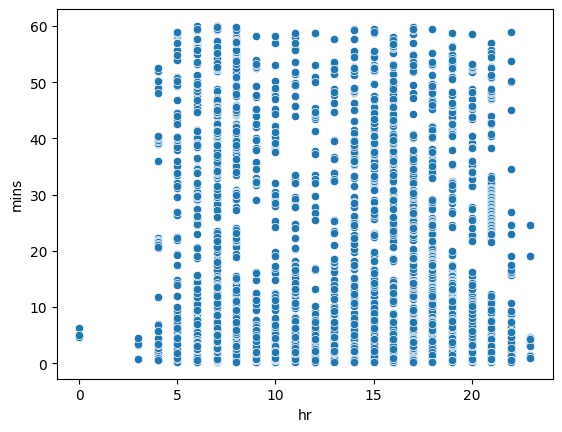

In [119]:
ax = sns.scatterplot(data=df, x="hr", y="mins")

### Merge


In [21]:
df_routes_data = pd.read_csv("processed-time.csv")

In [22]:
df_routes_data["sid1"] = df_routes_data["sid1"].astype(int)
df_routes_data["sid2"] = df_routes_data["sid2"].astype(int)
# df_routes_data[(df_routes_data['mins'] > 30) & (df_routes_data['mins'] < 60)]

In [23]:
df_routes_data['sid1'] = df_routes_data['sid1'].astype(int)
df_routes_data['sid2'] = df_routes_data['sid2'].astype(int)
df_routes_data

ts1        lat         lon  speed direction  sid1  \
0        2023-10-03 07:37:52  13.881394  100.458466     12        go  4151   
1        2023-10-03 09:02:52  13.826181  100.503210      1        go  3320   
2        2023-10-03 09:35:11  13.873371  100.459790     11        go  2155   
3        2023-10-03 06:07:53  13.873243  100.459910     13        go  2155   
4        2023-10-03 13:26:56  13.873158  100.460049      9        go  2155   
...                      ...        ...         ...    ...       ...   ...   
4957510  2024-02-05 14:07:03  13.620055  100.386805      5        go  4686   
4957511  2024-02-05 06:41:36  13.808138  100.649417      0        go  3240   
4957512  2024-02-05 20:16:38  13.712805  100.435943      4      back  3695   
4957513  2024-02-05 14:05:08  13.764223  100.538713      2        go  4156   
4957514  2024-02-05 14:05:08  13.764223  100.538713      2        go  4156   

         seq        vid route_id  sid2                  ts2       mins  hrs  \
0          4  16-5128 1     2-23  4142  2023-10-03 08:28:52  51.000000    7   
1         36  16-5128 1     2-23  3321  2023-10-03 09:03:52   1.000000    9   
2          6  16-5133 1     2-23  2157  2023-10-03 09:37:12   2.016667    9   
3          6  16-5122 1     2-23  2157  2023-10-03 06:09:53   2.000000    6   
4          6  16-5122 1     2-23  2157  2023-10-03 13:28:56   2.000000   13   
...      ...        ...      ...   ...                  ...        ...  ...   
4957510    0  13-0951 1     4-14  4716  2024-02-05 14:17:48  10.750000   14   
4957511    4  11-9290 1     1-38  5325  2024-02-05 06:43:06   1.500000    6   
4957512    6  12-0212 1     4-48  2276  2024-02-05 20:47:08  30.500000   20   
4957513   26  16-5775 1     4-62  4157  2024-02-05 14:13:07   7.983333   14   
4957514   26  16-5775 1     4-62  4157  2024-02-05 14:16:06  10.966667   14   

         day_of_week  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
4957510            0  
4957511            0  
4957512            0  
4957513            0  
4957514            0  

[4957515 rows x 14 columns]

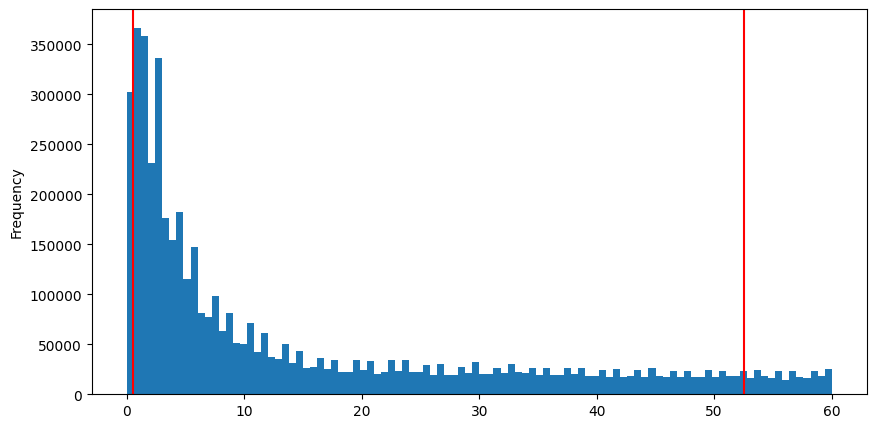

In [24]:
ax = df_routes_data['mins'].plot(kind='hist', figsize=(10, 5), bins=100)
ax.axvline(df_routes_data['mins'].quantile(.05), color='red')
ax.axvline(df_routes_data['mins'].quantile(.95), color='red')

372 สาย _ 7 วัน _ 24 ชั่วโมง


In [28]:
custom_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

list = []
for _, row in relationship_route.iterrows():
    route = row["route_id"]
    direction = row["direction"]
    seq = row["seq"]
    sid1 = row["sid1"]
    sid2 = row["sid2"]

    for day in custom_order:
        for i in range(0, 24):
            new_row_data = {
                "route_id": str(route),
                "direction": direction,
                "sid1": sid1,
                "sid2": sid2,
                "seq": seq,
                "hrs": i,
                "day_of_week": day,
            }
            list.append(new_row_data)

missing_df = pd.DataFrame(list)

1886808

In [46]:
duplicated_df = pd.concat([missing_df, df_routes_data], ignore_index=True)
duplicated_df

,route_id,direction,sid1,sid2,seq,hrs,day_of_week,vid,ts1,lat,lon,speed,latlon,ts2,mins
1117200,3-6,go,4575,4938,0.0,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1117201,3-6,go,4575,4938,0.0,1,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1117202,3-6,go,4575,4938,0.0,2,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1117203,3-6,go,4575,4938,0.0,3,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1117204,3-6,go,4575,4938,0.0,4,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122403,3-6,back,3708,5388,14.0,19,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122404,3-6,back,3708,5388,14.0,20,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122405,3-6,back,3708,5388,14.0,21,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1122406,3-6,back,3708,5388,14.0,22,Sunday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# def map_time_periods(hour):
#     if 7 <= hour <= 9:
#         return '7:00–9:00'
#     elif 9 <= hour <= 16:
#         return '9:00-16:00'
#     elif 16 <= hour <= 19:
#         return '16:00-19:00'
#     else:
#         return '19:00-6:00'


# duplicated_df['time_periods'] = duplicated_df['hrs'].apply(map_time_periods)
# duplicated_df

,route_id,direction,sid1,sid2,seq,hrs,day_of_week,vid,ts1,lat,lon,speed,latlon,ts2,mins,time_periods
0,1-1,go,4769.0,3905.0,0.0,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:00-6:00
1,1-1,go,4769.0,3905.0,0.0,1,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:00-6:00
2,1-1,go,4769.0,3905.0,0.0,2,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:00-6:00
3,1-1,go,4769.0,3905.0,0.0,3,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:00-6:00
4,1-1,go,4769.0,3905.0,0.0,4,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19:00-6:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740859,1-38,back,2914.0,2915.0,7.0,22,Friday,16-2328 1,2024-01-26 22:30:44,13.748610,100.567360,3.0,13.7486-100.5674,2024-01-26 22:31:59,1.25,19:00-6:00
1740860,4-22E,back,3820.0,4941.0,1.0,22,Friday,12-5571 1,2024-01-26 22:33:21,13.799083,100.548500,0.0,13.7991-100.5485,2024-01-26 22:37:36,4.25,19:00-6:00
1740861,4-48,back,3695.0,2276.0,6.0,22,Friday,12-0284 1,2024-01-26 22:57:14,13.712833,100.435888,17.0,13.7128-100.4359,2024-01-26 23:19:29,22.25,19:00-6:00
1740862,3-17E,back,4686.0,4690.0,0.0,23,Friday,16-1917 1,2024-01-26 23:02:35,13.620110,100.386750,0.0,13.6201-100.3868,2024-01-26 23:16:05,13.50,19:00-6:00


In [38]:
TravelTime = (
    duplicated_df.groupby(
        ["route_id", "direction","seq","sid1", "sid2", "hrs", "day_of_week"]
    )[["mins"]]
    .mean()
    .round(2)
)
TravelTime.reset_index(inplace=True)
TravelTime

,route_id,direction,seq,sid1,sid2,hrs,day_of_week,mins
0,1-1,back,0.0,4749,4596,0,Friday,NaN
1,1-1,back,0.0,4749,4596,0,Monday,NaN
2,1-1,back,0.0,4749,4596,0,Saturday,NaN
3,1-1,back,0.0,4749,4596,0,Sunday,NaN
4,1-1,back,0.0,4749,4596,0,Thursday,NaN
...,...,...,...,...,...,...,...,...
1544419,S8,go,20.0,5185,5186,23,Saturday,NaN
1544420,S8,go,20.0,5185,5186,23,Sunday,NaN
1544421,S8,go,20.0,5185,5186,23,Thursday,NaN
1544422,S8,go,20.0,5185,5186,23,Tuesday,NaN


In [39]:
TravelTime.sort_values(by=["route_id", "seq", "hrs"], inplace=True)
TravelTime.head(20)

,route_id,direction,seq,sid1,sid2,hrs,day_of_week,mins
0,1-1,back,0.0,4749,4596,0,Friday,NaN
1,1-1,back,0.0,4749,4596,0,Monday,NaN
2,1-1,back,0.0,4749,4596,0,Saturday,NaN
3,1-1,back,0.0,4749,4596,0,Sunday,NaN
4,1-1,back,0.0,4749,4596,0,Thursday,NaN
5,1-1,back,0.0,4749,4596,0,Tuesday,NaN
6,1-1,back,0.0,4749,4596,0,Wednesday,NaN
3024,1-1,go,0.0,4769,3905,0,Friday,NaN
3025,1-1,go,0.0,4769,3905,0,Monday,NaN
3026,1-1,go,0.0,4769,3905,0,Saturday,NaN


In [ ]:
# mean_df = (TravelTime.groupby(["route_id", "sid1", "sid2", "time_periods"])[
#            ["mins"]].mean()).reset_index()
# mean_df.loc[~mean_df['mins'].isna()]

In [ ]:
# bottom_5 = test['mins'].quantile(.05)
# top_5 = test['mins'].quantile(.95)

# test['quantile_5'] = TravelTime["mins"].quantile(.05)
# test

In [40]:
quantile_5 = TravelTime["mins"].quantile(0.05)
quantile_95 = TravelTime["mins"].quantile(0.95)

random_values = np.random.uniform(quantile_5, quantile_95, TravelTime["mins"].isnull().sum())

TravelTime["mins"].fillna(pd.Series(random_values, index=TravelTime.index[TravelTime["mins"].isnull()]), inplace=True)
TravelTime

,route_id,direction,seq,sid1,sid2,hrs,day_of_week,mins
0,1-1,back,0.0,4749,4596,0,Friday,9.611549
1,1-1,back,0.0,4749,4596,0,Monday,8.487118
2,1-1,back,0.0,4749,4596,0,Saturday,52.171572
3,1-1,back,0.0,4749,4596,0,Sunday,18.462221
4,1-1,back,0.0,4749,4596,0,Thursday,50.603463
...,...,...,...,...,...,...,...,...
1540891,S8,back,30.0,1654,1660,23,Saturday,10.776446
1540892,S8,back,30.0,1654,1660,23,Sunday,45.081871
1540893,S8,back,30.0,1654,1660,23,Thursday,36.992353
1540894,S8,back,30.0,1654,1660,23,Tuesday,18.346189


In [29]:
TravelTime.loc[TravelTime['mins'].isna()]

route_id direction  sid1  sid2  seq  hrs day_of_week  \
0            1-1        go  4769  3905    0    0      Monday   
1            1-1        go  4769  3905    0    1      Monday   
2            1-1        go  4769  3905    0    2      Monday   
3            1-1        go  4769  3905    0    3      Monday   
4            1-1        go  4769  3905    0    4      Monday   
...          ...       ...   ...   ...  ...  ...         ...   
6844318     4-14        go  4686  4716    0   14           0   
6844319     1-38        go  3240  5325    4    6           0   
6844320     4-48      back  3695  2276    6   20           0   
6844321     4-62        go  4156  4157   26   14           0   
6844322     4-62        go  4156  4157   26   14           0   

                         ts1        lat         lon  speed        vid  \
0                        NaN        NaN         NaN    NaN        NaN   
1                        NaN        NaN         NaN    NaN        NaN   
2                        NaN        NaN         NaN    NaN        NaN   
3                        NaN        NaN         NaN    NaN        NaN   
4                        NaN        NaN         NaN    NaN        NaN   
...                      ...        ...         ...    ...        ...   
6844318  2024-02-05 14:07:03  13.620055  100.386805    5.0  13-0951 1   
6844319  2024-02-05 06:41:36  13.808138  100.649417    0.0  11-9290 1   
6844320  2024-02-05 20:16:38  13.712805  100.435943    4.0  12-0212 1   
6844321  2024-02-05 14:05:08  13.764223  100.538713    2.0  16-5775 1   
6844322  2024-02-05 14:05:08  13.764223  100.538713    2.0  16-5775 1   

                         ts2       mins  
0                        NaN        NaN  
1                        NaN        NaN  
2                        NaN        NaN  
3                        NaN        NaN  
4                        NaN        NaN  
...                      ...        ...  
6844318  2024-02-05 14:17:48  10.750000  
6844319  2024-02-05 06:43:06   1.500000  
6844320  2024-02-05 20:47:08  30.500000  
6844321  2024-02-05 14:13:07   7.983333  
6844322  2024-02-05 14:16:06  10.966667  

[6844323 rows x 14 columns]

In [32]:
# merged_df = base_df.merge(df_routes_data, how='left', on=['route_id','direction','sid1','sid2', 'seq', 'hrs','day_of_week'], indicator=True)

# missing_rows = merged_df[merged_df['_merge'] == 'left_only']
# missing_rows

In [ ]:
# missing_rows.drop(columns=["lat", "lon","ts1","speed","vid","ts2","mins","_merge"], inplace=True)
# missing_rows.to_csv("missing_rows.csv", index=False)

In [33]:
mean_mins_per_group = duplicated_df.groupby(['sid1', 'sid2','hrs', 'day_of_week'])['mins'].transform('mean')
mean_mins_per_group

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
6844318    11.982270
6844319     1.465217
6844320    31.205882
6844321     0.573649
6844322     0.573649
Name: mins, Length: 6844323, dtype: float64

In [36]:
duplicated_df['mins'] = duplicated_df['mins'].fillna(mean_mins_per_group)
len(duplicated_df.isna())

6844323

In [37]:
TravelTime.loc[TravelTime['route_id'] == '3-6']

,route_id,direction,sid1,sid2,seq,hrs,day_of_week,ts1,lat,lon,speed,vid,ts2,mins
0,1-1,go,4769,3905,0,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,1-1,go,3905,3916,1,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,1-1,go,3916,1999,2,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,1-1,go,1999,1791,4,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,1-1,go,1791,3073,5,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885800,4-44,back,5176,5180,160,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1885968,4-44,back,5180,5179,162,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886136,4-44,back,5179,5181,163,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1886472,4-44,back,5182,4908,166,0,Monday,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
TravelTime = (
    duplicated_df.groupby(
        ["route_id", "direction", "seq", "sid1", "sid2", "hrs", "day_of_week"]
    )[["mins"]]
    .mean()
    .round(2)
)
TravelTime.reset_index(inplace=True)
TravelTime

In [ ]:
# TravelTime.loc[TravelTime['mins'].isna()]

In [ ]:
TravelTime.sort_values(by=["route_id", "seq", "hrs"], inplace=True)
TravelTime.head(20)

In [ ]:
# mean_df = (TravelTime.groupby(["route_id", "sid1", "sid2", "time_periods"])[
#            ["mins"]].mean()).reset_index()
# mean_df.loc[~mean_df['mins'].isna()]

In [ ]:
# bottom_5 = test['mins'].quantile(.05)
# top_5 = test['mins'].quantile(.95)

# test['quantile_5'] = TravelTime["mins"].quantile(.05)
# test

In [ ]:
Q3, Q1 = np.percentile(TravelTime["mins"], [25, 75])

IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
lower_bound

# TravelTime = TravelTime.loc[(TravelTime['mins']>=lower_bound)&(TravelTime['mins']<=upper_bound)]

In [ ]:
quantile_5 = TravelTime["mins"].quantile(0.05)
quantile_95 = TravelTime["mins"].quantile(0.95)


random_values = np.random.uniform(
    quantile_5, quantile_95, TravelTime["mins"].isnull().sum()
)

TravelTime["mins"].fillna(
    pd.Series(random_values,
              index=TravelTime.index[TravelTime["mins"].isnull()]),
    inplace=True,
)
TravelTime

In [ ]:
TravelTime.loc[TravelTime["mins"].isna()]

In [ ]:
ax = TravelTime["mins"].plot(kind="hist", figsize=(10, 5), bins=100)
ax.axvline(TravelTime["mins"].quantile(0.05), color="red")
ax.axvline(TravelTime["mins"].quantile(0.95), color="red")

In [ ]:
TravelTime.loc[TravelTime["route_id"] == "1-42L"]

In [ ]:
TravelTime.to_csv("Travel_time(newbus).csv")